# Salary_Data_Train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
Salary_Data_train=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
Salary_Data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
Salary_Data_train.shape

(30161, 14)

In [6]:
data_for_train=pd.DataFrame(Salary_Data_train)

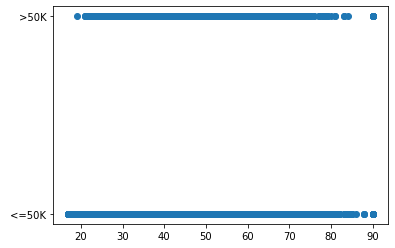

In [7]:
plt.scatter(data_for_train.age,data_for_train.Salary)

In [8]:
# create dummies for sex
dummies = pd.get_dummies(data_for_train['sex']).rename(columns=lambda x: 'sex_' + str(x))
# bring the dummies back into the original dataset
data_for_train = pd.concat([data_for_train, dummies], axis=1)
print(data_for_train)

       age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationsh

In [9]:
# create dummies for maritalstatus
dummies = pd.get_dummies(data_for_train['maritalstatus']).rename(columns=lambda x: 'maritalstatus_' + str(x))
# bring the dummies back into the original dataset
data_for_train = pd.concat([data_for_train, dummies], axis=1)
print(data_for_train)

       age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationsh

In [10]:
data_for_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'sex_ Female',
       'sex_ Male', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [11]:
col = list(data_for_train.columns)[1:3]
data_for_train.drop(col, axis=1, inplace=True)

In [12]:
col = list(data_for_train.columns)[2:11]
data_for_train.drop(col, axis=1, inplace=True)

In [13]:
data_for_train.columns

Index(['age', 'educationno', 'Salary', 'sex_ Female', 'sex_ Male',
       'maritalstatus_ Divorced', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [14]:
data_for_train.shape

(30161, 12)

In [15]:
ip_columns = ['age','educationno','sex_ Female','sex_ Male','maritalstatus_ Divorced','maritalstatus_ Married-AF-spouse','maritalstatus_ Married-civ-spouse','maritalstatus_ Married-spouse-absent','maritalstatus_ Never-married','maritalstatus_ Separated','maritalstatus_ Widowed']
op_column = ['Salary']

In [16]:
# Splitting data into train and test
Xtrain,Xtest,ytrain,ytest = train_test_split(data_for_train[ip_columns],data_for_train[op_column],test_size=0.3, random_state=0)


In [17]:
ignb = GaussianNB()
imnb = MultinomialNB()

In [18]:
# Building and predicting at the same time 
pred_gnb = ignb.fit(Xtrain,ytrain).predict(Xtest)
pred_mnb = imnb.fit(Xtrain,ytrain).predict(Xtest)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
# Confusion matrix GaussianNB model
confusion_matrix(ytest,pred_gnb) # GaussianNB model
pd.crosstab(ytest.values.flatten(),pred_gnb) # confusion matrix using 
np.mean(pred_gnb==ytest.values.flatten()) # 71.89%

0.7189744723173831

In [20]:
# Confusion matrix multinomialNB model
confusion_matrix(ytest,pred_mnb) # multinomialNB model
pd.crosstab(ytest.values.flatten(),pred_mnb) # confusion matrix using 
np.mean(pred_mnb==ytest.values.flatten()) # 71.52%

0.7152171510664161

In [21]:
confusion_matrix(ytest,pred_mnb) # multinomailNB model

array([[4770, 2028],
       [ 549, 1702]], dtype=int64)

In [22]:
confusion_matrix(ytest,pred_gnb) # GaussianNB model

array([[4707, 2091],
       [ 452, 1799]], dtype=int64)

# Salary_Data_Test

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [74]:
Salary_Data_test=pd.read_csv("SalaryData_Test(1).csv")

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [76]:
Salary_Data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [77]:
Salary_Data_test.shape

(15060, 14)

In [78]:
data_for_test=pd.DataFrame(Salary_Data_test)

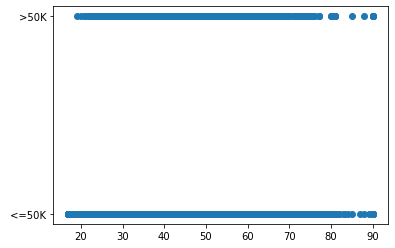

In [79]:
plt.scatter(data_for_test.age,data_for_test.Salary)

In [80]:
# create dummies for sex
dummies = pd.get_dummies(data_for_test['sex']).rename(columns=lambda x: 'sex_' + str(x))
# bring the dummies back into the original dataset
data_for_test = pd.concat([data_for_test, dummies], axis=1)
print(data_for_test)

       age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race 

In [81]:
# create dummies for maritalstatus
dummies = pd.get_dummies(data_for_test['maritalstatus']).rename(columns=lambda x: 'maritalstatus_' + str(x))
# bring the dummies back into the original dataset
data_for_test = pd.concat([data_for_test, dummies], axis=1)
print(data_for_test)

       age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race 

In [82]:
data_for_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'sex_ Female',
       'sex_ Male', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [83]:
col = list(data_for_test.columns)[1:3]
data_for_test.drop(col, axis=1, inplace=True)

In [84]:
col = list(data_for_test.columns)[2:11]
data_for_test.drop(col, axis=1, inplace=True)

In [85]:
data_for_test.columns

Index(['age', 'educationno', 'Salary', 'sex_ Female', 'sex_ Male',
       'maritalstatus_ Divorced', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed'],
      dtype='object')

In [86]:
data_for_test.shape

(15060, 12)

In [87]:
ip_columns = ['age','educationno','sex_ Female','sex_ Male','maritalstatus_ Divorced','maritalstatus_ Married-AF-spouse','maritalstatus_ Married-civ-spouse','maritalstatus_ Married-spouse-absent','maritalstatus_ Never-married','maritalstatus_ Separated','maritalstatus_ Widowed']
op_column = ['Salary']

In [88]:
# Splitting data into train and test
Xtrain,Xtest,ytrain,ytest = train_test_split(data_for_test[ip_columns],data_for_test[op_column],test_size=0.3, random_state=0)


In [89]:
ignb = GaussianNB()
imnb = MultinomialNB()

In [90]:
data_for_test.head(20)

,age,educationno,Salary,sex_ Female,sex_ Male,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,25,7,<=50K,0,1,0,0,0,0,1,0,0
1,38,9,<=50K,0,1,0,0,1,0,0,0,0
2,28,12,>50K,0,1,0,0,1,0,0,0,0
3,44,10,>50K,0,1,0,0,1,0,0,0,0
4,34,6,<=50K,0,1,0,0,0,0,1,0,0
5,63,15,>50K,0,1,0,0,1,0,0,0,0
6,24,10,<=50K,1,0,0,0,0,0,1,0,0
7,55,4,<=50K,0,1,0,0,1,0,0,0,0
8,65,9,>50K,0,1,0,0,1,0,0,0,0
9,36,13,<=50K,0,1,0,0,1,0,0,0,0


In [91]:
# Building and predicting at the same time 
pred_gnb = ignb.fit(Xtrain,ytrain).predict(Xtest)
pred_mnb = imnb.fit(Xtrain,ytrain).predict(Xtest)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [92]:
# Confusion matrix GaussianNB model
confusion_matrix(ytest,pred_gnb) # GaussianNB model
pd.crosstab(ytest.values.flatten(),pred_gnb) # confusion matrix using 
np.mean(pred_gnb==ytest.values.flatten()) # 71.89%

0.7248782647189022

In [93]:
# Confusion matrix multinomialNB model
confusion_matrix(ytest,pred_mnb) # multinomialNB model
pd.crosstab(ytest.values.flatten(),pred_mnb) # confusion matrix using 
np.mean(pred_mnb==ytest.values.flatten()) # 71.52%

0.7268702965914121

In [94]:
confusion_matrix(ytest,pred_mnb) # multinomailNB model

array([[2413,  972],
       [ 262,  871]], dtype=int64)

In [95]:
confusion_matrix(ytest,pred_gnb) # GaussianNB model

array([[2335, 1050],
       [ 193,  940]], dtype=int64)